In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from typing import List, Tuple

## Read data

In [81]:
df = pd.read_csv('guitar-data.csv')
df

,name,brand,price,fret-amount,string-amount,scale,body,body-material
0,IBANEZ GRG121DX-BKF,IBANEZ,27.60,22,6,25.5,Modern stat,тополь
1,ROCKDALE Stars Black Limited Edition HSS BK,ROCKDALE,13.30,24,6,24.5,Stratocaster,тополь
2,IBANEZ GRX70QA-TRB,IBANEZ,23.94,24,6,25.5,Superstrat,тополь
3,ROCKDALE Stars HSS BK,ROCKDALE,12.20,24,6,25.5,Stratocaster,тополь
4,IBANEZ GRG121DX-WNF,IBANEZ,27.90,22,6,25.5,Superstrat,красное дерево
...,...,...,...,...,...,...,...,...
2523,"GRETSCH G2655 Streamliner C/Block Jr. DC, V-St...",GRETSCH,84.00,22,6,26.5,Superstrat,тополь
2524,"GRETSCH G2622 Streamliner C/Block DC, V-Stopta...",GRETSCH,86.00,24,6,26.5,Modern stat,ольха
2525,"GRETSCH G2622 Streamliner C/Block DC, V-Stopta...",GRETSCH,86.00,24,6,24.5,Stratocaster,тополь
2526,"GRETSCH G2655 Streamliner C/Block Jr. DC, V-St...",GRETSCH,86.00,22,6,26.5,Stratocaster,красное дерево


## EDA

In [82]:
df.shape

(2528, 8)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           2523 non-null   object 
 1   brand          2523 non-null   object 
 2   price          2523 non-null   float64
 3   fret-amount    2528 non-null   int64  
 4   string-amount  2528 non-null   int64  
 5   scale          2528 non-null   float64
 6   body           2528 non-null   object 
 7   body-material  2528 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 158.1+ KB


As we can see we don't need preprocess at all because I did it in the lab-1

In [84]:
df.nunique()

name             2475
brand             120
price             950
fret-amount         2
string-amount       1
scale              21
body               17
body-material      23
dtype: int64

In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,2523.0,98.085257,109.059848,7.142,30.9725,66.0,123.000,1569.0
fret-amount,2528.0,22.975475,0.999897,22.000,22.0000,22.0,24.000,24.0
string-amount,2528.0,6.000000,0.000000,6.000,6.0000,6.0,6.000,6.0
scale,2528.0,25.442154,0.801413,18.750,24.5000,25.5,26.125,34.0


Handle null values

In [86]:
df.isnull().sum()

name             5
brand            5
price            5
fret-amount      0
string-amount    0
scale            0
body             0
body-material    0
dtype: int64

In [87]:
df = df.dropna()
df.isnull().sum()

name             0
brand            0
price            0
fret-amount      0
string-amount    0
scale            0
body             0
body-material    0
dtype: int64

#  

In [88]:
print(df['brand'].value_counts())
brand_counts = df['brand'].value_counts()
BRANDS = brand_counts.index.tolist()

brand
FENDER           354
SCHECTER         237
IBANEZ           211
ARIA             153
JACKSON          129
                ... 
PM200-NT           1
AT100CL-SB         1
LGB30-NT           1
JSM10-VYS          1
RGD7521PB-DSF      1
Name: count, Length: 120, dtype: int64


In [89]:
print(df['body'].value_counts())
body_counts = df.body.value_counts()
BODIES = body_counts.index.tolist()

body
Superstrat      811
Stratocaster    809
Modern stat     668
Telecaster       65
другая форма     59
Les paul         52
Flying-v         18
Sg               13
Explorer          7
Jazzmaster        6
Mustang           4
Jaguar            4
Offset            2
Concert           2
с вырезом         1
Dreadnought       1
резонаторный      1
Name: count, dtype: int64


In [90]:
print(df['body-material'].value_counts())
body_material_counts = df['body-material'].value_counts()
BODY_MATERIALS = body_material_counts.index.tolist()

body-material
ольха             617
тополь            594
красное дерево    557
клён              457
липа              170
ясень              23
окуме              21
ньятон             18
платан             12
нато               10
меранти             8
орех                6
падук               5
агатис              5
вишня               4
сапеле              4
ламинат             4
сосна               2
павловния           2
анегри              1
сассафрас           1
сунгкай             1
ель                 1
Name: count, dtype: int64


### Let's see what distributions do we have

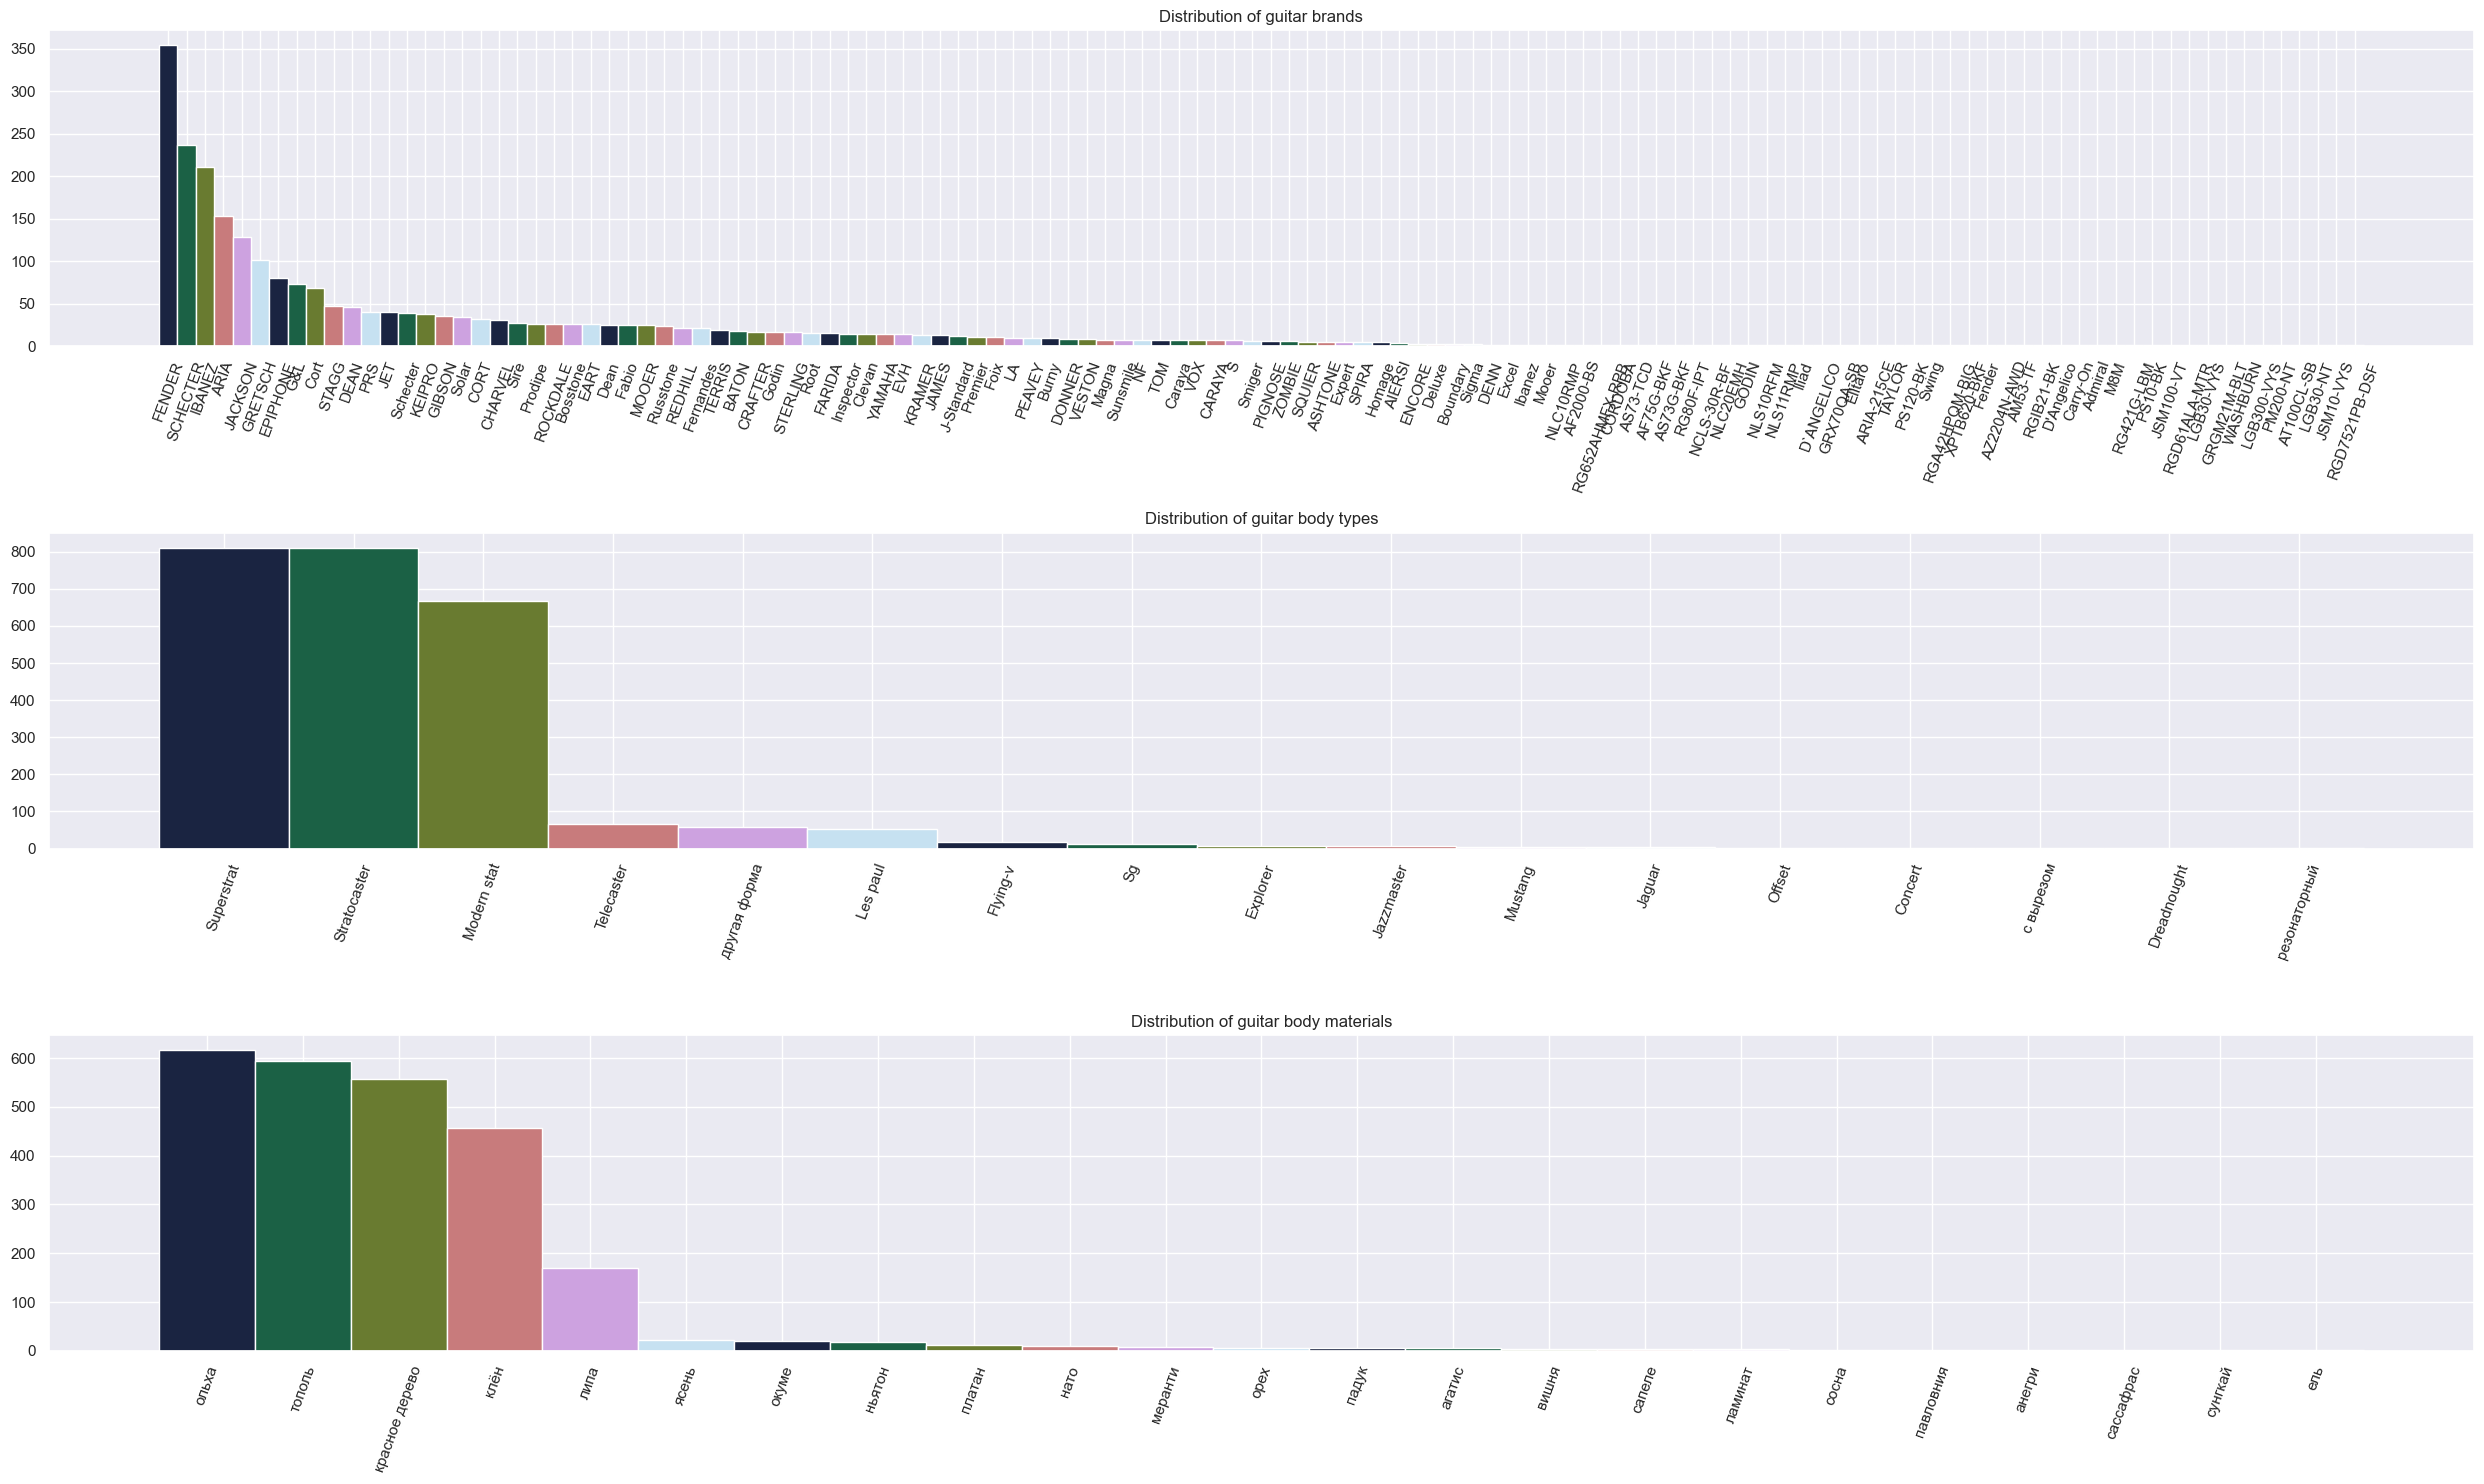

In [91]:
subplot_name = ['Distribution of guitar brands', 'Distribution of guitar body types', 'Distribution of guitar body materials']

arr_names = (BRANDS, BODIES, BODY_MATERIALS)
arr_counts = (brand_counts, body_counts, body_material_counts)

n = 1
indx = 0

sns.set(rc={'figure.figsize': (25, 15)})

for i in range(3):
    plt.subplot(3, 1, n)
    plt.bar(arr_names[i], arr_counts[i], color=sns.color_palette('cubehelix'), width=1, align='center')
    plt.title(subplot_name[i])
    plt.xticks(rotation=70)
    plt.tight_layout()

    n += 1
    indx += 1

plt.show()

In [92]:
df_encoded = df.copy()
le = LabelEncoder()

In [93]:
df_encoded['brand'] = le.fit_transform(df['brand'])
df_encoded['body'] = le.fit_transform(df['body'])
df_encoded['body-material'] = le.fit_transform(df['body-material'])

df_encoded = df_encoded.drop(columns=['name', 'string-amount'])
df_encoded['price'] = np.log1p(df['price'])

df_encoded

,brand,price,fret-amount,scale,body,body-material
0,53,3.353407,22,25.5,7,21
1,95,2.660260,24,24.5,11,21
2,53,3.216473,24,25.5,12,21
3,95,2.580217,24,25.5,11,21
4,53,3.363842,22,25.5,12,5
...,...,...,...,...,...,...
2523,48,4.442651,22,26.5,12,21
2524,48,4.465908,24,26.5,7,12
2525,48,4.465908,24,24.5,11,21
2526,48,4.465908,22,26.5,11,5


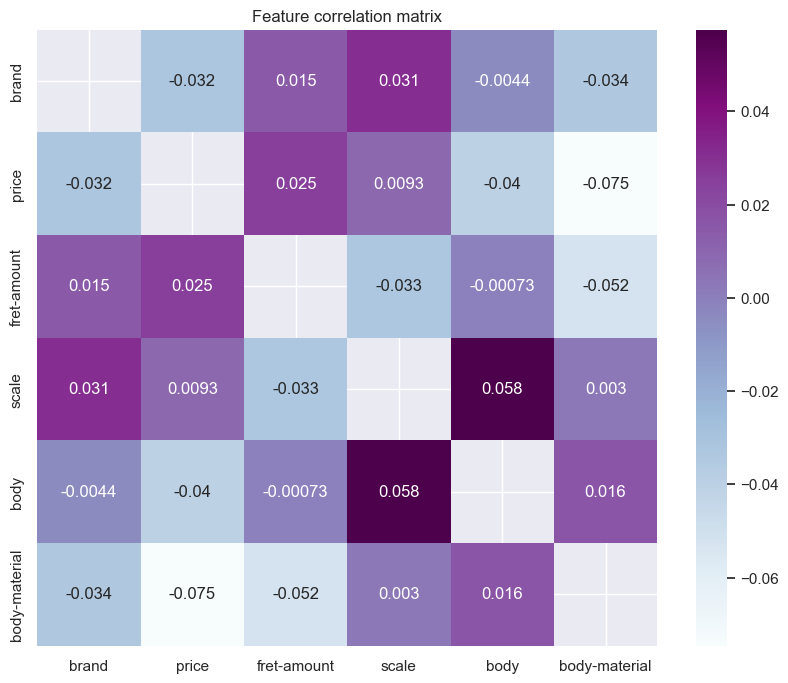

In [94]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='BuPu', mask=np.eye(df_encoded.shape[1]))
plt.title('Feature correlation matrix')
plt.show()

## Choose data and fit it with imported model

My model will show regression between price and brand
We have few outliers so I use log-transform to 

In [95]:
X = df_encoded[['brand']]
y = df_encoded[['price']]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

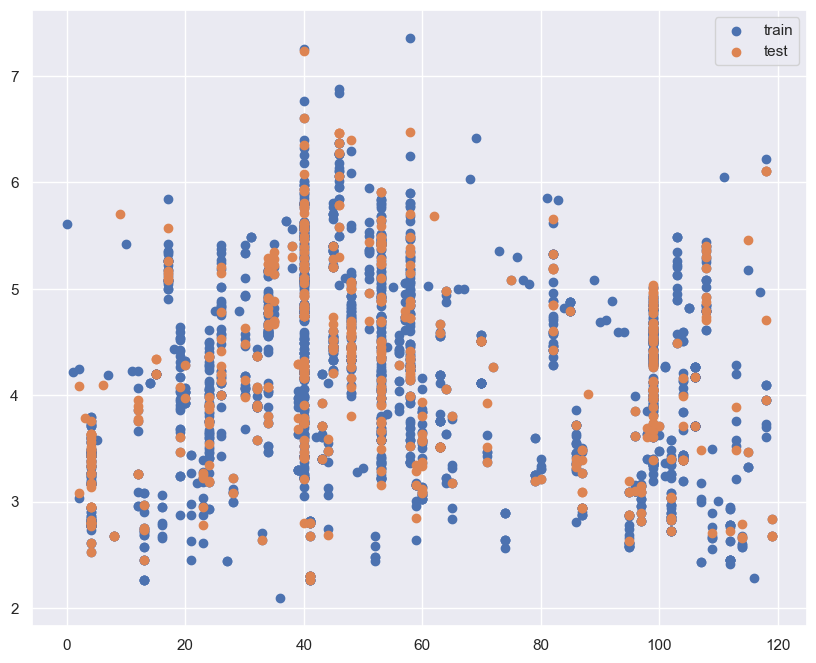

In [97]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.legend(['train', 'test'])
plt.show()

### Make baseline and train imported model

In [98]:
model = LinearRegression()

In [99]:
model.fit(X_train, y_train)

LinearRegression()

In [100]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [101]:
from sklearn.metrics import r2_score

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("R2 train:", train_r2)
print("R2 test:", test_r2)

R2 train: 0.0020064480154763364
R2 test: -0.007328017189059954


### Make my own implementation and test it

In [119]:
class LinearRegressor:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X_b = np.column_stack([np.ones(X.shape[0]), X])
        
        theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        
        self.intercept_ = theta[0]
        self.coef_ = theta[1:]

    def predict(self, X):
        return X.dot(self.coef_) + self.intercept_

In [120]:
my_model = LinearRegressor()
my_model.fit(X_train, y_train)

In [121]:
my_y_train_pred = my_model.predict(X_train)
my_y_test_pred = my_model.predict(X_test)

In [122]:
my_train_r2 = r2_score(y_train, my_y_train_pred)
my_test_r2 = r2_score(y_test, my_y_test_pred)

print("R2 train:", my_train_r2)
print("R2 test:", my_test_r2)

R2 train: 0.0020064480154762254
R2 test: -0.007328017189059954
